In [17]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Load the training dataset
train_df = pd.read_csv('sign_mnist_train.csv')

# Separate features (pixels) and labels (letters)
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values

# Normalize pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255

# Reshape the data to fit the model (assuming model expects 28x28 images)
X_train = X_train.reshape(-1, 28, 28, 1)

# One-hot encode the labels (since we have 25 classes: A-I and K-Y)
y_train = to_categorical(y_train, num_classes=25)

# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(25, activation='softmax')  # 25 output neurons for 25 classes (A-I, K-Y)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Save the trained model
model.save('sign_language_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.3101 - loss: 2.3719 - val_accuracy: 0.8310 - val_loss: 0.5188
Epoch 2/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8959 - loss: 0.3576 - val_accuracy: 0.9829 - val_loss: 0.0904
Epoch 3/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9905 - loss: 0.0694 - val_accuracy: 0.9987 - val_loss: 0.0222
Epoch 4/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9926 - loss: 0.0384 - val_accuracy: 0.9998 - val_loss: 0.0088
Epoch 5/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9999 - loss: 0.0063 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 6/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 7/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9993 - loss: 0.0045 - val_accuracy: 0.9909 - val_loss: 0.0371
Epoch 8/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9976 - loss: 0.0117 - val_accuracy: 0

In [18]:
import numpy as np
import pandas as pd
from keras.models import load_model
from keras.utils import to_categorical

# Load the test dataset
test_df = pd.read_csv('sign_mnist_test.csv')

# Separate features (pixels) and labels (letters)
X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

# Normalize pixel values to the range [0, 1]
X_test = X_test.astype('float32') / 255

# Reshape the data to fit the model (assuming model expects 28x28 images)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels (since we have 25 classes: A-I and K-Y)
y_test = to_categorical(y_test, num_classes=25)

# Load the saved model
model = load_model('sign_language_model.h5')

# Evaluate accuracy on the test set
test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy[1] * 100:.2f}%")


Test Accuracy: 92.50%


In [20]:
import numpy as np
import pandas as pd
from keras.models import load_model
from keras.utils import to_categorical

# Load the test dataset
test_df = pd.read_csv('sign_mnist_test.csv')

# Separate features (pixels) and labels (letters)
X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

# Normalize pixel values to the range [0, 1]
X_test = X_test.astype('float32') / 255

# Reshape the data to fit the model (assuming model expects 28x28 images)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels (since we have 25 classes: A-I and K-Y or 26 classes if 'J' is included)
y_test = to_categorical(y_test, num_classes=26)  # Changed to 26 if model includes all alphabets

# Load the saved model
model = load_model('sign_language_model.h5')

# Make predictions on the test set
predictions = model.predict(X_test)

# Convert the predicted probabilities to class labels (use argmax to get the index of the maximum value)
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels in y_test back to class labels (for comparison)
true_labels = np.argmax(y_test, axis=1)

# Ensure the class labels list is correct (A to Z including J and Z)
class_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

# Map the predicted numerical labels to the corresponding alphabetic letters
predicted_letters = [class_labels[label] for label in predicted_labels]

# Map the true numerical labels to the corresponding alphabetic letters
true_letters = [class_labels[label] for label in true_labels]

# Print some results to verify
print("Predicted Letters: ", predicted_letters[:10])  # Display first 10 predicted letters
print("True Letters: ", true_letters[:10])  # Display first 10 true letters

# Optionally, calculate and display the accuracy of the predictions
correct_predictions = sum([1 if p == t else 0 for p, t in zip(predicted_letters, true_letters)])
accuracy = correct_predictions / len(true_letters) * 100
print(f"Prediction Accuracy: {accuracy:.2f}%")


225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted Letters:  ['G', 'F', 'K', 'A', 'D', 'V', 'K', 'O', 'D', 'H']
True Letters:  ['G', 'F', 'K', 'A', 'D', 'V', 'K', 'O', 'D', 'H']
Prediction Accuracy: 92.50%


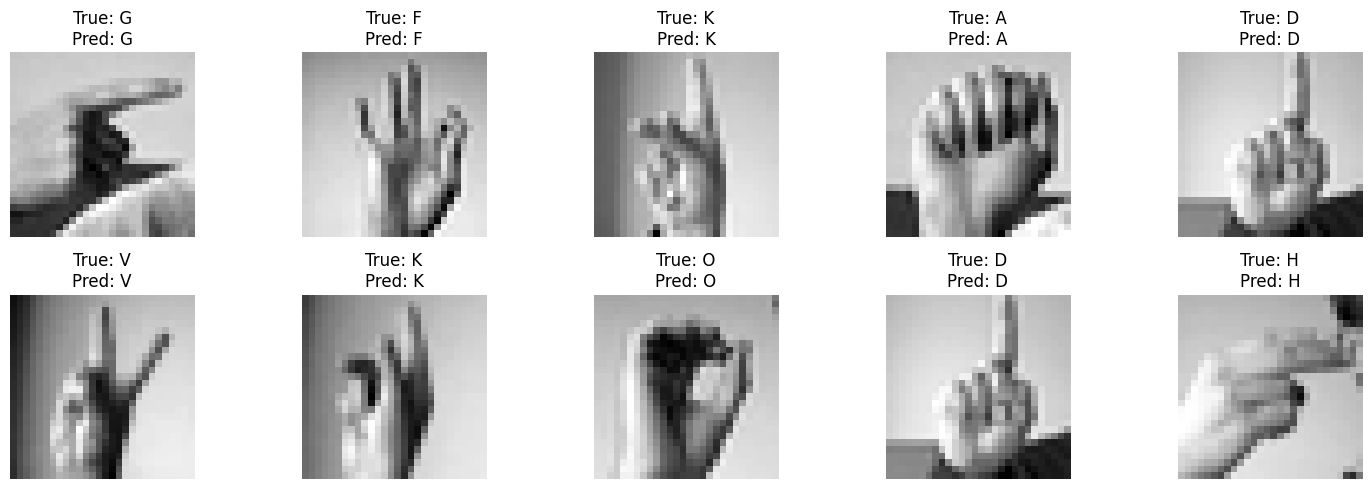

In [21]:
import matplotlib.pyplot as plt

# Function to visualize test samples, predictions, and true labels
def visualize_predictions(X, true_labels, predicted_labels, class_labels, num_samples=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(2, num_samples // 2, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {class_labels[true_labels[i]]}\nPred: {class_labels[predicted_labels[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Convert true and predicted labels to numerical indices for visualization
true_label_indices = [class_labels.index(label) for label in true_letters]
predicted_label_indices = [class_labels.index(label) for label in predicted_letters]

# Visualize the first 10 samples
visualize_predictions(X_test, true_label_indices, predicted_label_indices, class_labels, num_samples=10)
